In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import joblib
import gc
import warnings
import sys
warnings.filterwarnings('ignore')
import math
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix,classification_report
from functools import partial
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from joblib import parallel_backend
import dill
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.metrics import confusion_matrix
sb.set()

In [2]:
time_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_1.csv")
freq_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_1.csv")

combined_1 = pd.concat([time_1, freq_1], axis=1)
combined_1=combined_1[combined_1['0']!=2]
combined_1.dropna(inplace=True)
combined_1

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-173.968750,-161,-191,67.749023,8.230979,174.163357,173.968750,0.0,30,...,-1.279370,96.494643,88.051405,8.557427,-0.872340,89.489531,136.257608,9.806951,-1.097899,138.768663
2,0,-175.250000,-151,-202,88.531250,9.409105,175.502404,175.250000,0.0,51,...,-0.865323,56.195788,63.713318,7.871782,-0.394283,63.921791,74.847254,9.314909,-0.680520,75.500136
3,0,-163.968750,-141,-181,89.624023,9.466997,164.241819,163.968750,0.0,40,...,5.093917,344.585264,65.109948,9.225050,-1.171882,66.581253,218.366460,9.725060,-0.927582,225.153998
4,0,-160.375000,-141,-191,118.359375,10.879309,160.743585,160.375000,0.0,50,...,13.650000,633.804876,64.618683,8.919283,-0.940924,63.942849,218.073292,8.902031,0.603874,216.260808
5,0,-180.484375,-161,-202,138.593506,11.772574,180.867916,180.484375,0.0,41,...,5.606094,491.672603,144.043261,9.642371,-1.334032,141.936111,265.252185,7.097721,1.180612,271.647464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10559,1,242.250000,2848,-1181,327142.093750,571.963367,621.149866,367.156250,3.0,4029,...,3.584311,14651.951783,21151.398069,6.277861,0.883775,21361.361570,8098.965874,7.657653,0.165531,8014.746988
10560,1,334.640625,2616,-939,300198.136475,547.903401,642.014396,431.171875,2.0,3555,...,17.804934,6753.460860,7302.111771,3.780667,7.219301,7446.247857,2691.128789,7.695633,-0.262886,2824.954003
10561,1,373.515625,3616,-1757,650379.812256,806.461290,888.759661,558.359375,4.0,5373,...,22.147079,8721.484677,7563.168185,4.492189,1.965671,7727.781379,2745.258900,6.347818,3.202689,2665.622007
10562,1,402.265625,4111,-1747,902242.913818,949.864682,1031.533105,621.828125,4.0,5858,...,22.837088,11586.049003,4801.245306,5.257542,8.880867,4621.252143,6055.613588,6.643926,0.842814,6058.026124


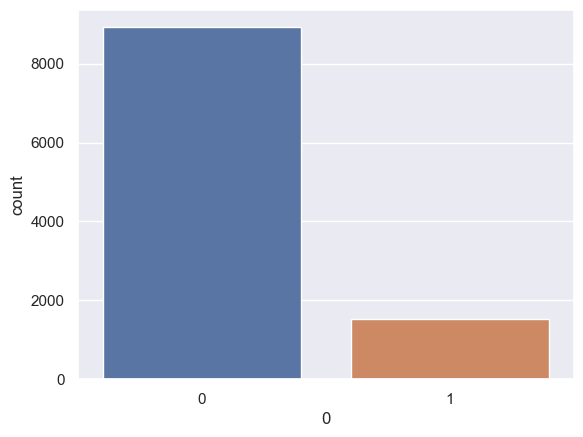

In [3]:
X_train = combined_1.drop('0', axis=1)
y_train = combined_1['0']

sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [4]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

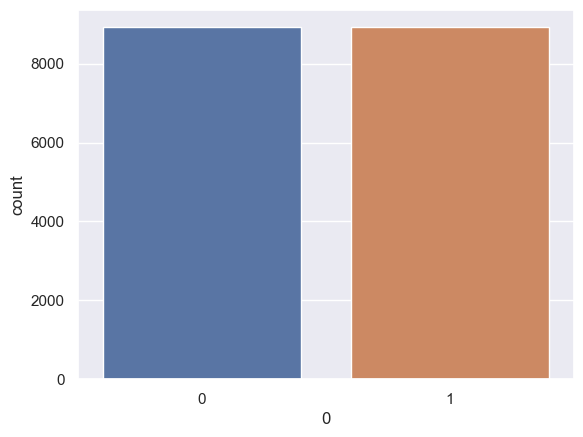

In [5]:
sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [7]:
time_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\time_1.csv")
freq_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\freq_1.csv")

combined_1 = pd.concat([time_1, freq_1], axis=1)
combined_1=combined_1[combined_1['0']!=2]
combined_1.dropna(inplace=True)
combined_1

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-49.000000,40,-121,1248.468750,35.333677,60.410833,51.500000,3.0,161,...,10.039375,749.133121,401.868267,5.687177,3.065411,396.901626,407.636343,6.799307,-0.451582,410.023970
2,0,-48.437500,50,-90,763.183594,27.625778,55.761770,52.187500,1.0,140,...,2.147757,422.762913,472.885439,6.117379,4.352043,431.871326,583.876629,7.485470,0.887373,579.969943
3,0,-52.390625,40,-161,1289.019287,35.902915,63.512179,55.203125,2.0,201,...,18.137231,1518.442726,394.170673,5.880113,4.005669,397.543734,579.901794,7.172086,1.296841,631.137687
4,0,-58.656250,20,-141,675.444336,25.989312,64.156060,59.281250,1.0,161,...,4.501930,350.988400,300.569947,6.165776,2.724835,284.665987,453.666990,8.852153,-0.730138,471.165346
5,0,-62.484375,20,-151,936.156006,30.596667,69.573365,63.421875,2.0,171,...,15.865800,949.672028,480.210202,5.163164,5.378842,474.842192,285.089063,8.529474,-1.408363,293.566347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,1,-299.781250,80,-1070,43811.702148,209.312451,365.623440,304.156250,3.0,1150,...,20.866522,126349.878532,154590.605397,4.676570,4.297052,153533.391235,46108.460419,6.736600,4.565822,46469.677452
1853,1,-298.203125,151,-989,50521.161865,224.769130,373.425047,313.609375,3.0,1140,...,4.488984,50589.249008,70089.630000,3.847146,4.645833,71928.704278,38528.870572,7.259966,0.319513,38780.637364
1854,1,-299.328125,161,-949,44182.626709,210.196638,365.759420,306.234375,2.0,1110,...,7.248765,86768.504298,57969.145779,4.415949,8.643078,56178.405692,23618.170080,9.529694,-1.239337,22684.863966
1855,1,-283.046875,1565,-2373,375094.513428,612.449601,674.692557,455.515625,9.0,3938,...,8.339644,182392.340633,247674.315384,5.960941,0.283042,248462.406018,68573.477054,7.599953,-0.333362,65597.092918


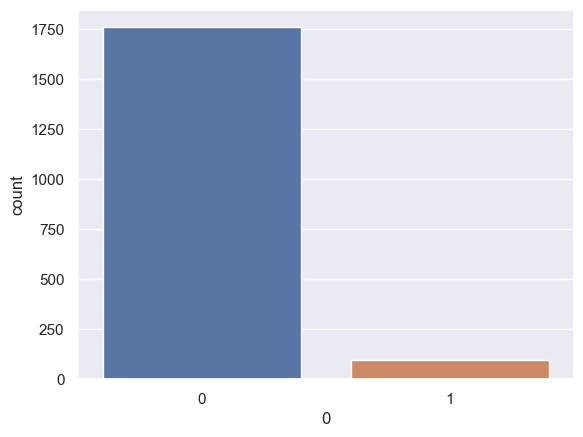

In [8]:
X_test = combined_1.drop('0', axis=1)
y_test = combined_1['0']

sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [9]:
smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_test, y_test)

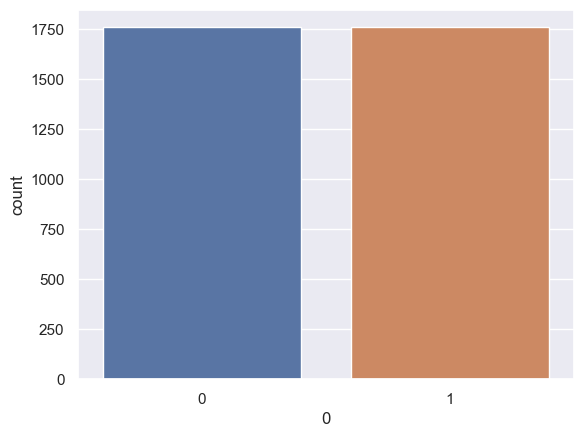

In [10]:
sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [11]:
scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)

In [12]:
def objective(trial):
    # Define the hyperparameters to be tuned
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 1, 7)
    
    # Additional hyperparameters
    gamma = trial.suggest_loguniform('gamma', 1e-5, 1e5)  # applicable for 'rbf', 'poly', 'sigmoid'
    shrinking = trial.suggest_categorical('shrinking', [True, False])
    tol = trial.suggest_loguniform('tol', 1e-5, 1e-1)
    decision_function_shape = trial.suggest_categorical('decision_function_shape', ['ovo', 'ovr'])
    
    model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma,
                shrinking=shrinking, tol=tol, decision_function_shape=decision_function_shape, random_state=42, verbose=2)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy as the objective to be optimized
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
    specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])

    mcc = matthews_corrcoef(y_test, y_pred)
    return mcc + sensitivity + specificity

In [ ]:
# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150, n_jobs = 16)

# Get the best hyperparameters from the study
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_model = SVC(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final Accuracy on Test Set:", final_accuracy)

[I 2023-12-16 17:36:42,669] A new study created in memory with name: no-name-d1af8026-17c2-4451-931d-ea25b9cfd957


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[I 2023-12-16 17:38:03,440] Trial 10 finished with value: 1.6400255611187435 and parameters: {'C': 663.9383698809676, 'kernel': 'poly', 'degree': 4, 'gamma': 20.592597018432883, 'shrinking': False, 'tol': 1.0000066667611382e-05, 'decision_function_shape': 'ovr'}. Best is trial 10 with value: 1.6400255611187435.


[LibSVM]

[I 2023-12-16 17:38:50,651] Trial 0 finished with value: 1.8690289157071724 and parameters: {'C': 0.0025846840596857826, 'kernel': 'linear', 'degree': 7, 'gamma': 0.3178047670620035, 'shrinking': True, 'tol': 0.022256980686165315, 'decision_function_shape': 'ovr'}. Best is trial 0 with value: 1.8690289157071724.


[LibSVM]

[I 2023-12-16 17:38:57,790] Trial 15 finished with value: 1.6802972611229579 and parameters: {'C': 8686.425162999014, 'kernel': 'poly', 'degree': 4, 'gamma': 0.000459213431267746, 'shrinking': True, 'tol': 0.022709770385968078, 'decision_function_shape': 'ovo'}. Best is trial 0 with value: 1.8690289157071724.


[LibSVM]

[I 2023-12-16 17:39:01,319] Trial 8 finished with value: 1.9986912359266658 and parameters: {'C': 24.80740391952468, 'kernel': 'rbf', 'degree': 2, 'gamma': 2.8094283745136456e-05, 'shrinking': False, 'tol': 0.0006204163467786933, 'decision_function_shape': 'ovr'}. Best is trial 8 with value: 1.9986912359266658.


[LibSVM]

[I 2023-12-16 17:39:05,308] Trial 2 finished with value: 1.7795065563701413 and parameters: {'C': 10.009383961912238, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.006481241347291876, 'shrinking': True, 'tol': 0.002880459996237062, 'decision_function_shape': 'ovo'}. Best is trial 8 with value: 1.9986912359266658.


[LibSVM]

[I 2023-12-16 17:40:21,165] Trial 19 finished with value: 1.6272593302076288 and parameters: {'C': 0.010353670863527934, 'kernel': 'poly', 'degree': 4, 'gamma': 0.03291414347996102, 'shrinking': False, 'tol': 1.263291699330742e-05, 'decision_function_shape': 'ovr'}. Best is trial 8 with value: 1.9986912359266658.


[LibSVM]

[I 2023-12-16 17:40:48,941] Trial 12 finished with value: 1.8444410846458115 and parameters: {'C': 0.0001702099667705118, 'kernel': 'poly', 'degree': 3, 'gamma': 0.02409044768858266, 'shrinking': True, 'tol': 3.3727012415113985e-05, 'decision_function_shape': 'ovr'}. Best is trial 8 with value: 1.9986912359266658.


[LibSVM]

[I 2023-12-16 17:40:55,571] Trial 18 finished with value: 1.8650081209095362 and parameters: {'C': 0.0010980230071100828, 'kernel': 'poly', 'degree': 5, 'gamma': 1091.5948185417583, 'shrinking': False, 'tol': 0.019402834636615875, 'decision_function_shape': 'ovo'}. Best is trial 8 with value: 1.9986912359266658.


[LibSVM]

[I 2023-12-16 17:40:59,402] Trial 6 finished with value: 2.0086652292353957 and parameters: {'C': 4.0893082000013004e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 35314.99483729088, 'shrinking': True, 'tol': 0.011283182079344714, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:41:15,008] Trial 17 finished with value: 1.6292026212481745 and parameters: {'C': 0.09215320084028734, 'kernel': 'linear', 'degree': 4, 'gamma': 1.1933817424056673e-05, 'shrinking': True, 'tol': 0.002438527828925079, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:42:01,181] Trial 24 finished with value: 1.7686829547043033 and parameters: {'C': 2282.9422424756012, 'kernel': 'sigmoid', 'degree': 6, 'gamma': 0.0006450585183036736, 'shrinking': True, 'tol': 0.0024581052510510024, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:42:59,821] Trial 20 finished with value: 1.5576422014103333 and parameters: {'C': 0.31111958407106144, 'kernel': 'linear', 'degree': 7, 'gamma': 12.515874541485802, 'shrinking': True, 'tol': 0.024777253812971006, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:43:27,566] Trial 14 finished with value: 1.0 and parameters: {'C': 0.04794408122355182, 'kernel': 'poly', 'degree': 7, 'gamma': 1.776671089278546e-05, 'shrinking': False, 'tol': 0.0006576298678099226, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:43:53,100] Trial 21 finished with value: 1.7004776824947965 and parameters: {'C': 0.30797254962304044, 'kernel': 'sigmoid', 'degree': 6, 'gamma': 0.9915050967938709, 'shrinking': False, 'tol': 1.672952211966192e-05, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:43:57,216] Trial 7 finished with value: 1.0 and parameters: {'C': 8.000071459628521e-05, 'kernel': 'poly', 'degree': 5, 'gamma': 0.0014601088948521708, 'shrinking': True, 'tol': 0.0004063209018398756, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:44:02,525] Trial 4 finished with value: 1.0 and parameters: {'C': 0.23010380780951697, 'kernel': 'poly', 'degree': 3, 'gamma': 8.900598234397323e-05, 'shrinking': True, 'tol': 1.320512604649326e-05, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:44:11,907] Trial 13 finished with value: 1.0 and parameters: {'C': 0.32351655527391504, 'kernel': 'rbf', 'degree': 6, 'gamma': 4163.6654153878235, 'shrinking': True, 'tol': 0.00033714145957538047, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:45:04,488] Trial 16 finished with value: 1.0 and parameters: {'C': 4.43338959186999e-05, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.1180272894328142, 'shrinking': False, 'tol': 0.013684792814536518, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:48:22,441] Trial 11 finished with value: 1.513658499060841 and parameters: {'C': 1.2241455789096891, 'kernel': 'linear', 'degree': 1, 'gamma': 4.8148470655561833e-05, 'shrinking': False, 'tol': 0.01356006458343957, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:48:42,752] Trial 25 finished with value: 1.616428941518345 and parameters: {'C': 1.590551991589294e-05, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 20660.050372687347, 'shrinking': True, 'tol': 0.0952005330948591, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:50:18,182] Trial 27 finished with value: 1.0 and parameters: {'C': 1.1104777189399406e-05, 'kernel': 'rbf', 'degree': 1, 'gamma': 65296.570623170315, 'shrinking': False, 'tol': 0.00018287721203989003, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:51:20,982] Trial 30 finished with value: 1.0 and parameters: {'C': 17.206831731373796, 'kernel': 'rbf', 'degree': 1, 'gamma': 40098.34530181139, 'shrinking': False, 'tol': 0.09906337446798323, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:51:38,811] Trial 32 finished with value: 1.0 and parameters: {'C': 21.344310403913152, 'kernel': 'rbf', 'degree': 1, 'gamma': 59152.75647441882, 'shrinking': False, 'tol': 0.09077824703420698, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:52:34,487] Trial 36 finished with value: 1.8679493301386545 and parameters: {'C': 0.001578236777112351, 'kernel': 'linear', 'degree': 2, 'gamma': 135.5168552763115, 'shrinking': True, 'tol': 0.08419575680381311, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:53:41,215] Trial 37 finished with value: 1.870221448803939 and parameters: {'C': 0.0012355900477536703, 'kernel': 'linear', 'degree': 2, 'gamma': 124.07766139476367, 'shrinking': True, 'tol': 0.00617414670807096, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:53:52,833] Trial 38 finished with value: 1.87128597892319 and parameters: {'C': 0.00200791633033198, 'kernel': 'linear', 'degree': 2, 'gamma': 139.29642476549694, 'shrinking': True, 'tol': 0.0048441955722120815, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:58:32,317] Trial 23 finished with value: 1.0 and parameters: {'C': 2361.0294683852453, 'kernel': 'rbf', 'degree': 3, 'gamma': 2.814551220061756, 'shrinking': True, 'tol': 0.044560463312163616, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 17:59:17,060] Trial 29 finished with value: 1.0 and parameters: {'C': 18.178889818178188, 'kernel': 'rbf', 'degree': 1, 'gamma': 67784.63560883202, 'shrinking': False, 'tol': 0.00029665478470922553, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:02:08,470] Trial 28 finished with value: 1.0 and parameters: {'C': 26.4988880100744, 'kernel': 'rbf', 'degree': 1, 'gamma': 18323.61595713273, 'shrinking': False, 'tol': 0.0003091569134514434, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:03:27,884] Trial 26 finished with value: 1.0 and parameters: {'C': 12.45992210592985, 'kernel': 'rbf', 'degree': 1, 'gamma': 13128.776415669312, 'shrinking': False, 'tol': 0.00026072673926272886, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:03:30,283] Trial 33 finished with value: 1.0 and parameters: {'C': 17.740429226040987, 'kernel': 'rbf', 'degree': 1, 'gamma': 96758.1899670348, 'shrinking': False, 'tol': 0.00012816957343697713, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:04:10,012] Trial 44 finished with value: 1.873543529866971 and parameters: {'C': 0.00962087474807507, 'kernel': 'linear', 'degree': 2, 'gamma': 651.5387135579014, 'shrinking': True, 'tol': 0.0012018996650179446, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:05:30,506] Trial 45 finished with value: 1.863341532411043 and parameters: {'C': 0.010175125364253522, 'kernel': 'linear', 'degree': 2, 'gamma': 568.4688678117216, 'shrinking': True, 'tol': 8.898729772172853e-05, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:06:17,840] Trial 47 finished with value: 1.853110521735744 and parameters: {'C': 0.010916672222119225, 'kernel': 'linear', 'degree': 2, 'gamma': 1443.8128439589657, 'shrinking': True, 'tol': 0.001114939797524993, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:06:43,557] Trial 46 finished with value: 1.8923226655966832 and parameters: {'C': 0.00025138574294829644, 'kernel': 'linear', 'degree': 2, 'gamma': 435.070918777511, 'shrinking': True, 'tol': 0.005791402009631594, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:07:21,516] Trial 31 finished with value: 1.0 and parameters: {'C': 29.237832720601144, 'kernel': 'rbf', 'degree': 1, 'gamma': 6062.5255233388725, 'shrinking': False, 'tol': 0.00013266001930331938, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:07:37,909] Trial 34 finished with value: 1.0 and parameters: {'C': 61.174817667076816, 'kernel': 'rbf', 'degree': 1, 'gamma': 88172.98258697771, 'shrinking': False, 'tol': 9.020264396456448e-05, 'decision_function_shape': 'ovo'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:08:58,610] Trial 48 finished with value: 1.920989892831597 and parameters: {'C': 0.00018125721557881035, 'kernel': 'linear', 'degree': 2, 'gamma': 2643.5876054593177, 'shrinking': True, 'tol': 0.0011339253132135658, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:09:27,972] Trial 49 finished with value: 1.8862109997840761 and parameters: {'C': 0.00027649824048441035, 'kernel': 'linear', 'degree': 3, 'gamma': 178.25157530775812, 'shrinking': True, 'tol': 0.006800603329175057, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:09:57,238] Trial 50 finished with value: 1.9064924066481315 and parameters: {'C': 0.00023482996295412463, 'kernel': 'linear', 'degree': 3, 'gamma': 4364.483756272603, 'shrinking': True, 'tol': 0.0012427906926920761, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:10:42,186] Trial 51 finished with value: 1.9136061478475976 and parameters: {'C': 0.0002143253050412195, 'kernel': 'linear', 'degree': 3, 'gamma': 26.461598524897628, 'shrinking': True, 'tol': 0.0011789801195288868, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

[I 2023-12-16 18:10:53,178] Trial 52 finished with value: 1.892275554884915 and parameters: {'C': 0.00026601992248208946, 'kernel': 'linear', 'degree': 3, 'gamma': 8.706903247812441, 'shrinking': True, 'tol': 0.001295231007939844, 'decision_function_shape': 'ovr'}. Best is trial 6 with value: 2.0086652292353957.


[LibSVM]

In [16]:
model = SVC(C=44.024421858647734, kernel='rbf', degree=2, gamma=0.000205737140185106,
                shrinking=False, tol=0.008294789872725751, decision_function_shape='ovr', random_state=42, verbose=2)
model.fit(X_train, y_train)

[LibSVM]

SVC(C=44.024421858647734, degree=2, gamma=0.000205737140185106, random_state=42,
    shrinking=False, tol=0.008294789872725751, verbose=2)

In [17]:
y_pred = model.predict(X_test)

In [18]:
sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
sensitivity

0.7709570957095709

In [19]:
specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])
specificity

0.8957095709570957

In [20]:
time_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\time_2.csv")
freq_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\freq_2.csv")

combined_2 = pd.concat([time_2, freq_2], axis=1)
combined_2=combined_2[combined_2['0']!=2]
combined_2.dropna(inplace=True)
combined_2

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-92.867188,-60,-111,138.787048,11.780791,93.611439,92.867188,0.0,51,...,-1.171239,58.864645,284.797495,8.586193,-0.250066,146.706231,225.303385,9.239492,-1.295030,113.960339
2,0,-98.382812,-60,-131,158.267517,12.580442,99.183896,98.382812,0.0,71,...,0.797436,289.747380,517.741618,8.545044,0.104245,261.698629,612.461094,9.806169,-1.044157,310.022144
3,0,-93.046875,-70,-131,139.935303,11.829425,93.795822,93.046875,0.0,61,...,-0.286805,104.606979,366.039197,7.879712,-0.298174,183.942145,503.652044,10.255825,-1.050005,273.178697
4,0,-86.226562,-60,-111,138.784607,11.780688,87.027609,86.226562,0.0,51,...,6.204703,335.111932,389.883408,8.697141,-0.961163,193.859577,532.655947,10.082875,-1.365646,263.070097
5,0,-79.859375,-50,-101,138.980225,11.788987,80.724841,79.859375,0.0,51,...,0.459116,543.999777,709.198059,7.834601,-0.411277,354.465320,755.266932,8.788601,-1.052153,377.287469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,1,-212.781250,-121,-555,3342.139648,57.811242,220.494898,212.781250,0.0,434,...,7.976103,3109.758017,11875.692583,5.324020,4.481550,5865.946519,6786.460318,9.701656,-1.397758,3422.585931
1921,1,-138.929688,1070,-616,34618.190369,186.059642,232.206047,181.726562,5.0,1686,...,5.840698,11938.751674,6413.508693,5.082923,3.122238,3134.650710,11657.534048,6.331695,2.264241,6002.581780
1922,1,-169.867188,2707,-4000,369040.318298,607.486887,630.789331,320.570312,8.0,6707,...,5.044006,8854.098434,22903.576170,5.561472,2.842575,11169.002538,20033.252278,10.429474,-1.405811,10198.144470
1923,1,-158.070312,1424,-1282,92965.143494,304.901859,343.440486,223.945312,6.0,2706,...,5.290342,13323.300193,15839.203213,6.362756,0.739057,7857.497693,20636.575331,8.890450,-0.118322,10460.701578


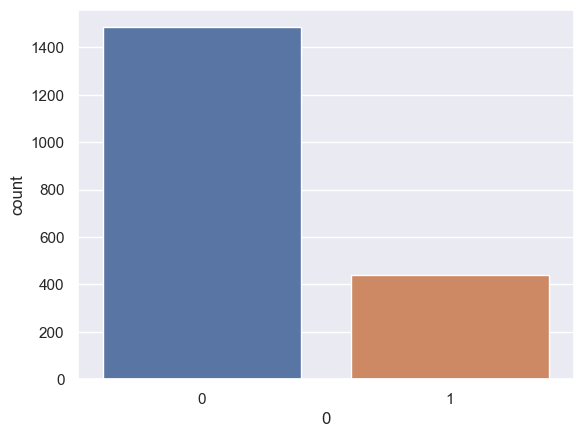

In [21]:
X_test = combined_2.drop('0', axis=1)
y_test = combined_2['0']

sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [22]:
smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_test, y_test)

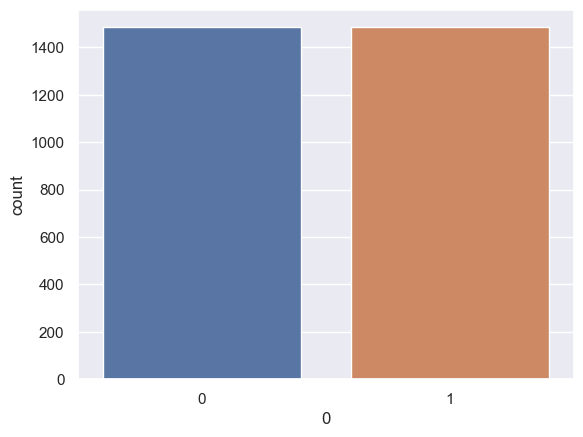

In [23]:
sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [24]:
scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)

In [25]:
y_pred = model.predict(X_test)

In [26]:
sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
sensitivity

0.8498316498316498

In [27]:
specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])
specificity

0.9057239057239057

In [28]:
time_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\time_3.csv")
freq_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\freq_3.csv")

combined_3 = pd.concat([time_3, freq_3], axis=1)
combined_3=combined_3[combined_3['0']!=2]
combined_3.dropna(inplace=True)
combined_3

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-95.328125,-60,-131,166.470459,12.902343,96.197307,95.328125,0.0,71,...,2.419555,281.810939,570.555777,8.335929,0.030989,192.035148,834.622144,9.659878,-0.691702,294.407003
2,0,-90.416667,-60,-131,148.628472,12.191328,91.234873,90.416667,0.0,71,...,-0.552668,105.537297,498.746029,7.552030,0.301747,165.676363,875.231678,9.862516,-0.740333,302.742313
3,0,-82.338542,-50,-111,155.203098,12.458054,83.275678,82.338542,0.0,61,...,0.365207,931.691162,1633.539989,8.065891,-0.655994,546.100665,1589.285590,8.544789,-0.950985,531.048456
4,0,-86.156250,-50,-121,213.413086,14.608665,87.385997,86.156250,0.0,71,...,3.455373,441.578584,995.234107,7.266270,1.042605,338.883284,1183.022238,9.595447,-0.338545,409.747421
5,0,-64.385417,-40,-101,135.778537,11.652405,65.431341,64.385417,0.0,61,...,-1.142516,104.661984,232.726992,8.248366,-1.009213,76.738626,502.970733,8.891524,-1.009908,173.889898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,1,-221.395833,1303,-1666,130474.384983,361.212382,423.663192,318.406250,6.5,2969,...,5.300557,17238.091178,35548.576009,4.965161,3.349228,12217.810851,35523.803153,6.099677,1.129934,12251.271178
1891,1,-202.005208,-10,-555,5147.557265,71.746479,214.368051,202.005208,0.0,545,...,10.107919,2745.142737,11382.092792,5.046247,5.837321,3711.254359,8915.271634,9.345960,-0.953310,3051.219872
1892,1,-145.713542,2707,-4000,266435.787733,516.174184,536.347111,274.713542,13.0,6707,...,4.293087,7633.285386,27350.079608,5.628157,3.126733,9076.919318,32420.597212,10.279633,-1.309036,10764.543226
1893,1,-170.859375,1868,-4767,256155.829183,506.118394,534.180452,283.390625,10.0,6635,...,5.374599,12199.190280,30439.194923,5.927679,1.497921,10201.338210,33216.569911,9.529312,-0.728003,11317.183109


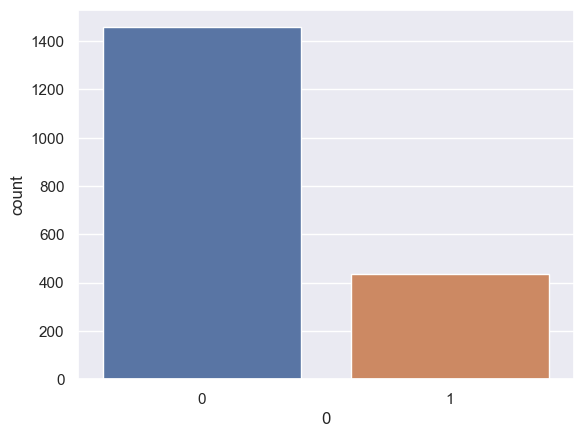

In [29]:
X_test = combined_3.drop('0', axis=1)
y_test = combined_3['0']

sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [30]:
smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_test, y_test)

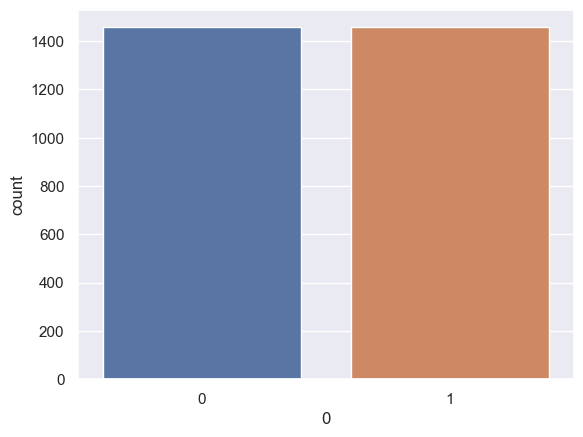

In [31]:
sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [32]:
scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)

In [33]:
y_pred = model.predict(X_test)

In [34]:
sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
sensitivity

0.8853809196980096

In [35]:
specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])
specificity

0.8894989704873026

In [36]:
time_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\time_4.csv")
freq_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\freq_4.csv")

combined_4 = pd.concat([time_4, freq_4], axis=1)
combined_4=combined_4[combined_4['0']!=2]
combined_4.dropna(inplace=True)
combined_4

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-95.714844,-60,-131,156.219467,12.498779,96.527461,95.714844,0.0,71,...,4.914410,532.741891,849.656405,8.920130,-0.380944,209.844824,1070.765469,9.676939,-0.476930,276.233538
2,0,-83.042969,-50,-111,149.017685,12.207280,83.935406,83.042969,0.0,61,...,1.449627,805.196574,1977.613808,8.103423,-0.649612,498.543348,1856.303467,9.143565,-1.041201,467.964242
3,0,-81.265625,-40,-121,277.827881,16.668170,82.957397,81.265625,0.0,81,...,2.797805,325.282907,1077.001491,7.501505,0.595910,268.022020,1444.601883,9.813800,-0.421680,380.804159
4,0,-60.742188,-30,-90,117.027283,10.817915,61.697979,60.742188,0.0,60,...,-0.674269,96.429962,473.338349,9.259800,-1.073804,119.481099,947.451274,10.607594,-1.058156,249.157521
5,0,-53.359375,-20,-90,116.058350,10.773038,54.436029,53.359375,0.0,70,...,-0.636243,103.702166,458.116405,9.738701,-0.777810,115.115045,1034.192003,10.887444,-1.158891,276.243192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,1,-135.632812,1161,-1454,59623.333923,244.178897,279.319877,200.734375,13.5,2615,...,1.940561,16603.822956,60251.779016,6.392922,1.193143,15029.837176,49621.209384,8.986113,-0.795741,12329.382860
1860,1,-203.246094,1303,-1666,140906.107407,375.374623,426.866586,314.519531,11.5,2969,...,5.290611,17567.711984,58701.641350,5.025412,2.946100,15140.837601,49453.344742,6.134160,1.757759,12570.759246
1861,1,-175.855469,1070,-616,20343.678329,142.631267,226.426200,197.253906,5.0,1686,...,12.686833,5156.228430,13451.851567,5.063008,5.243563,3432.880857,14002.005318,8.652820,-0.294055,3761.863737
1862,1,-172.621094,2454,-4767,299216.282211,547.006656,573.597702,295.480469,14.5,7221,...,5.039818,11662.499556,37356.913347,5.857129,1.413772,9352.659009,37946.566544,9.357364,-0.527445,9563.633522


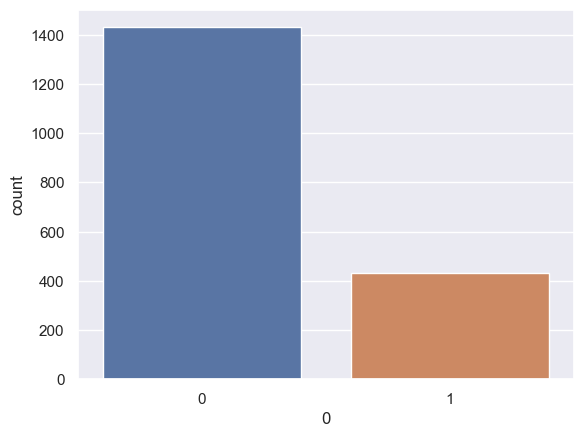

In [37]:
X_test = combined_4.drop('0', axis=1)
y_test = combined_4['0']

sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [38]:
smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_test, y_test)

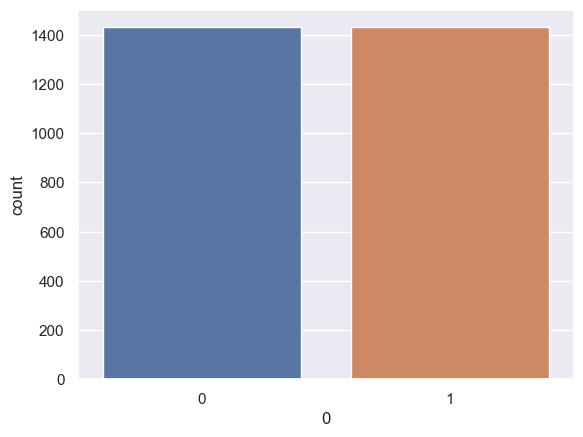

In [39]:
sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [40]:
scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)

In [41]:
y_pred = model.predict(X_test)

In [42]:
sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
sensitivity

0.9042627533193571

In [43]:
specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])
specificity

0.8902865129280224